https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

### Check Script Functions

In [98]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(name,
                          cm, 
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(name + '-' + title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.savefig(name+'.jpeg')

def check_script(source, sset,name):
    if sset == 'char':
        print('\n\033[1mCharacters:\033[0m')
        check_true = pd.read_csv('12-2-2018-char_hold_out.csv')
        check_true.columns
        del check_true['Unnamed: 0']
        del check_true['new_fn']
        check_true['old_fn'] = check_true['old_fn'].apply(lambda st: st[0:4])
        truth = check_true['old_fn'].values
        
        pred = pd.read_csv(source)
        pred = pred.iloc[:,-1].values
           
        print('% of Accurately Predicted Characters: {}'.format(accuracy_score(truth, pred)))
        print('# of Accurately Predicted Characters: {}'.format(accuracy_score(truth, pred, normalize=False)))
        
        [print('{}|{}'.format(i,u)) for i,u in zip(truth,pred) if i !=u]
    else:
        print('\n\033[1mScript:\033[0m')
        check_true = pd.read_csv('12-2-2018-script_hold_out.csv')
        check_true.columns
        del check_true['Unnamed: 0']
        del check_true['new_fn']
        check_true['old_fn'] = check_true['old_fn'].apply(lambda st: st[10:-8])
        class_names = check_true['old_fn'].unique()
        truth = check_true['old_fn'].values
        
        pred = pd.read_csv(source)
        pred = pred.iloc[:,-1].values
        
        cnf_matrix = confusion_matrix(truth, pred)
        plt.figure()
        plot_confusion_matrix(name,cnf_matrix, classes=class_names, normalize=True,
                              title='Normalized confusion matrix')

        plt.show()
        
        print('% of Accurately Predicted Scripts: {}'.format(accuracy_score(truth, pred)))

### Results

---John1 Predictions----

Characters:
% of Accurately Predicted Characters: 0.88
# of Accurately Predicted Characters: 44
bb50|aaf8
a8e4|a6a8
a4e5|ab48
ae61|a6e8
a8c6|b6c0
a4d2|a6e6

Script:
Normalized confusion matrix


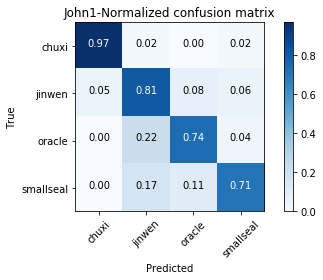

% of Accurately Predicted Scripts: 0.8290598290598291


In [99]:
n = 'John1'
print('\033[1m---{} Predictions----\033[0m'.format(n))
check_script('JMB_prediction_char_v1.csv','char',n)
check_script('JMB_prediction_script_v1.csv','script',n)

---John2 Predictions----

Characters:
% of Accurately Predicted Characters: 0.82
# of Accurately Predicted Characters: 41
bb50|ae61
a8e4|a6a8
a4e5|a9ce
a5bf|a5c1
ae61|a6e8
a45f|a569
a8c6|aa46
aaf8|ae61
a6e6|a470

Script:
Normalized confusion matrix


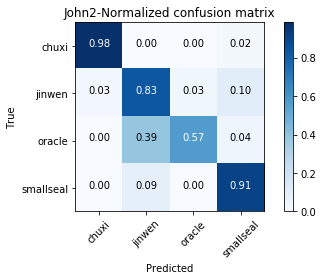

% of Accurately Predicted Scripts: 0.8589743589743589


In [100]:
n = 'John2'
print('\033[1m---{} Predictions----\033[0m'.format(n))
check_script('JMB_prediction_char_v2.csv','char',n)
check_script('JMB_prediction_script_v2.csv','script',n)

---Julie1 Predictions----

Script:
Normalized confusion matrix


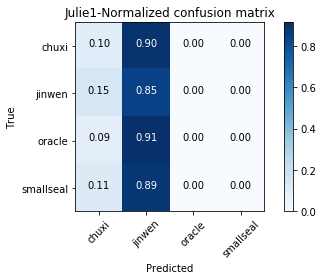

% of Accurately Predicted Scripts: 0.4444444444444444


In [101]:
n = 'Julie1'
print('\033[1m---{} Predictions----\033[0m'.format(n))
check_script('julie-holdout_pred.csv','script',n)

---Julie2 Predictions----

Script:
Normalized confusion matrix


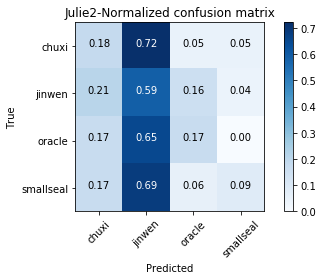

% of Accurately Predicted Scripts: 0.36752136752136755


In [102]:
n = 'Julie2'
print('\033[1m---{} Predictions----\033[0m'.format(n))
check_script('julie-holdout_new.csv','script',n)

In [103]:
n = 'MBorthwick'
print('\033[1m---{} Predictions----\033[0m'.format(n))
check_script('borthwick-guesses.csv','char',n)

---MBorthwick Predictions----

Characters:
% of Accurately Predicted Characters: 0.84
# of Accurately Predicted Characters: 42
bb50|b6c0
b3bd|b0a8
a4e5|a6a8
a5d5|a548
a4d1|bb50
a9ce|a7da
aaf8|b6c0
a6e6|a4a4
